In [1]:
# PB11
# Ahbaz Memon
# NOTE : hardcode is at last

# Library

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Make Data

In [3]:
X, Y = make_blobs(
    n_samples = 1000,
    n_features = 2,
    centers = 5,
    cluster_std = 1,
    center_box = (-15.0, 15.0),
    shuffle = True,
    random_state = 1
)

# Visualization of Real Data

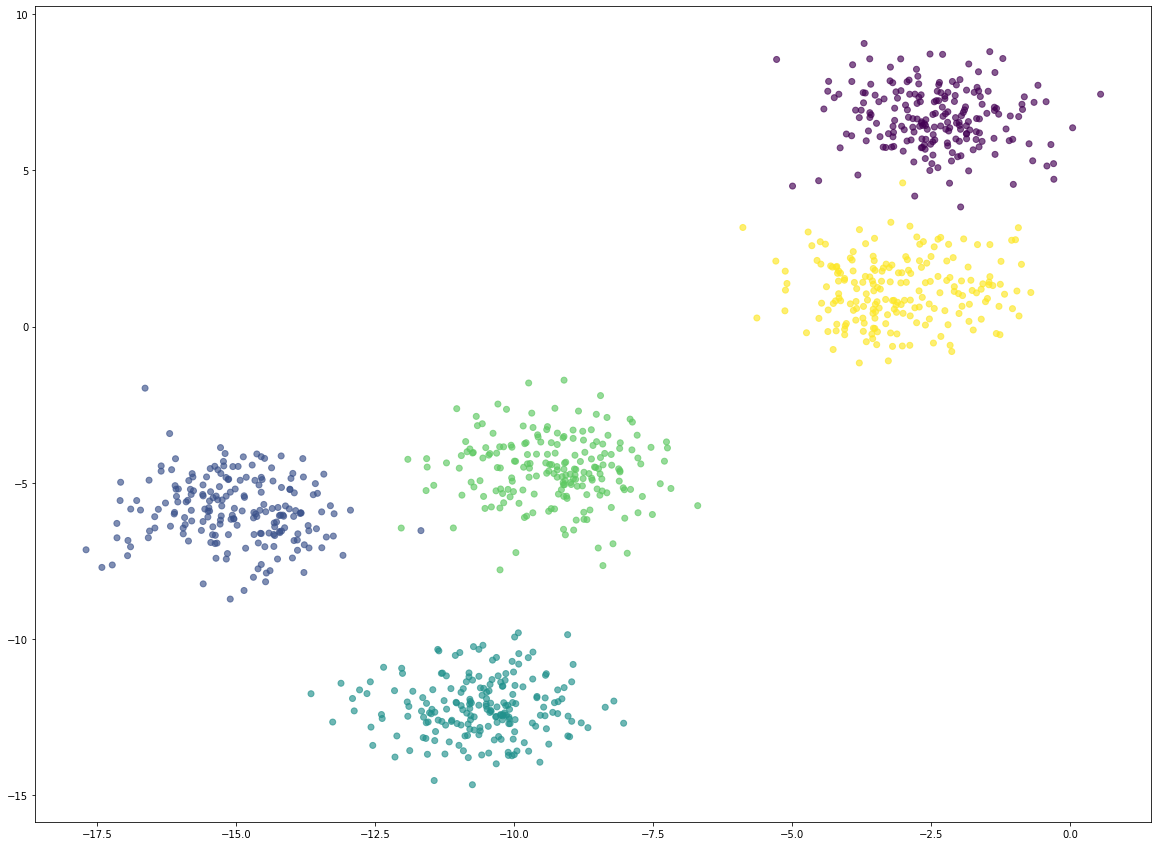

In [4]:
plt.figure(figsize = (20,15))
plt.scatter(X[:,0], X[:,1], alpha = 0.65, c = Y)

# KMeans

## Obtaining suitable K for data

score : 0.6675062952755906
score : 0.63382220638237
score : 0.6820281838310128
score : 0.7006502609515094
score : 0.6215582777592229
score : 0.5554479526331596
score : 0.4884033567868476
score : 0.414457428354416
score : 0.3287840028596277
score : 0.33166110497464707
score : 0.3320916854032554
score : 0.34115625438999564
score : 0.34055715539438813
score : 0.34437614542715594


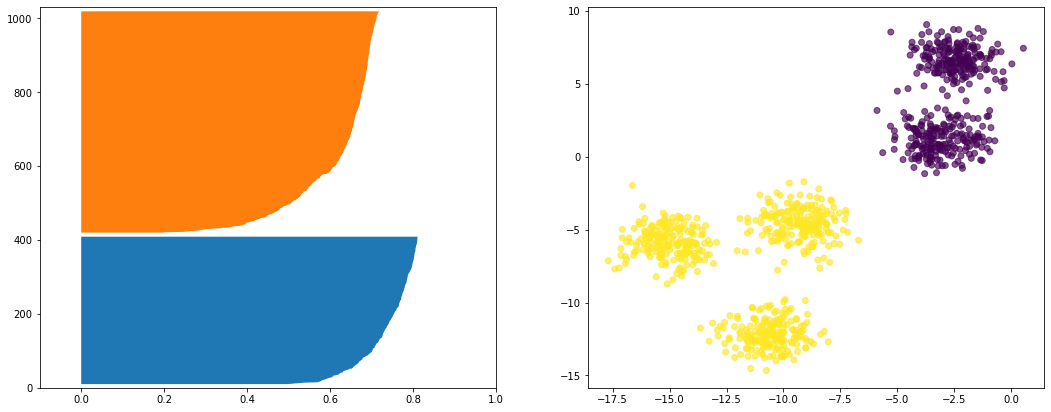

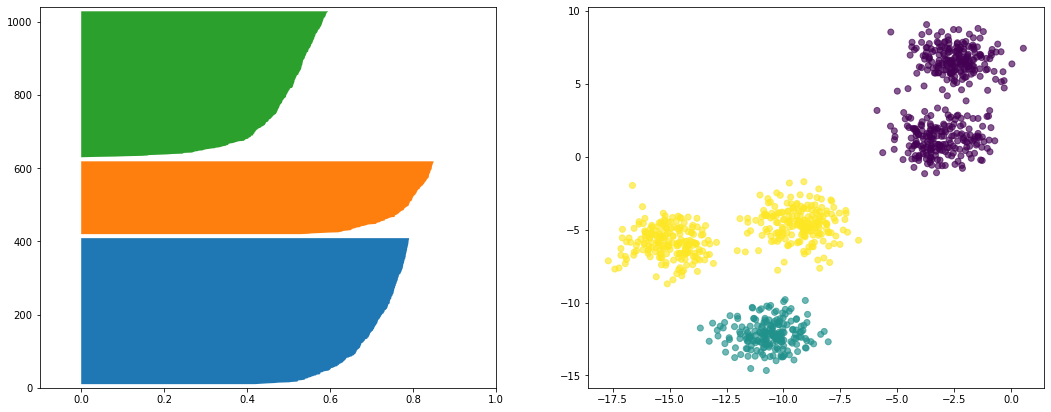

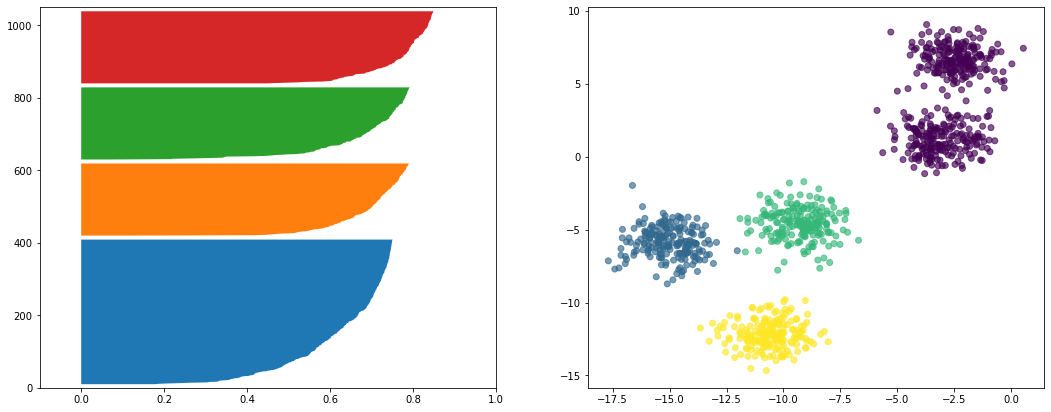

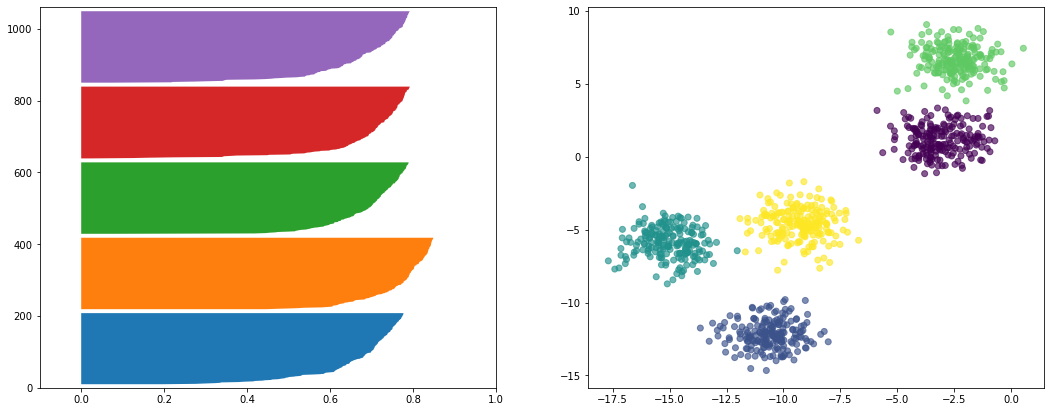

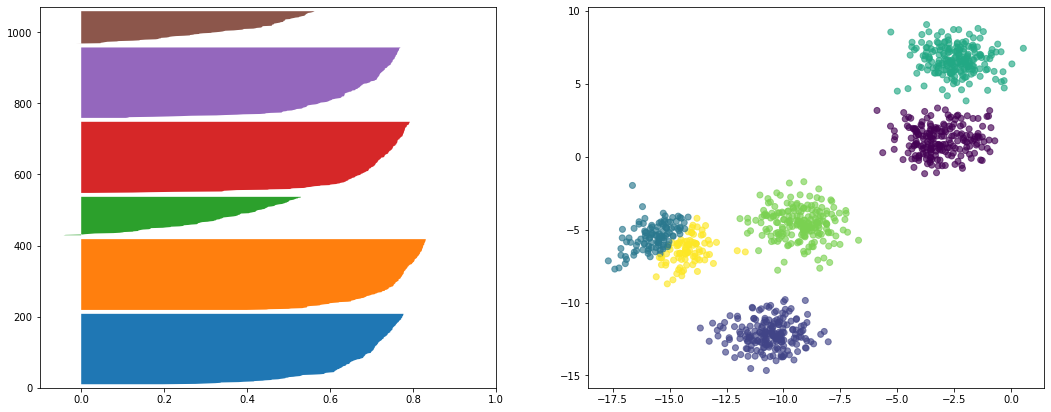

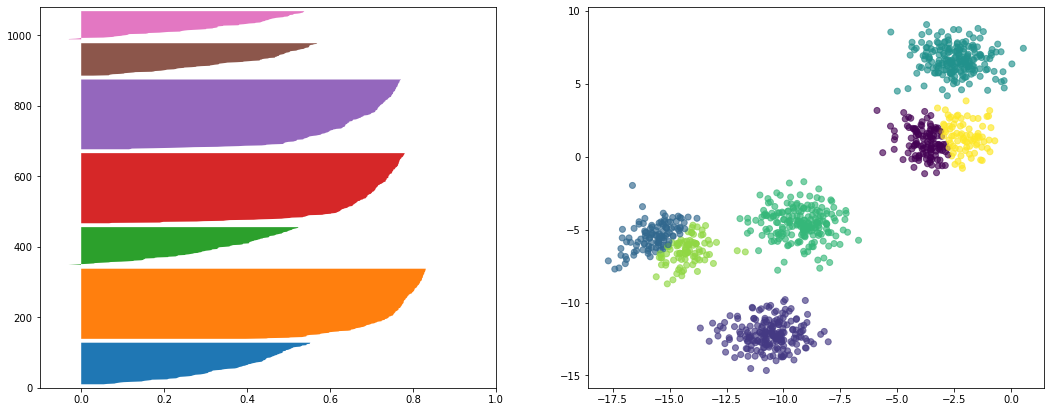

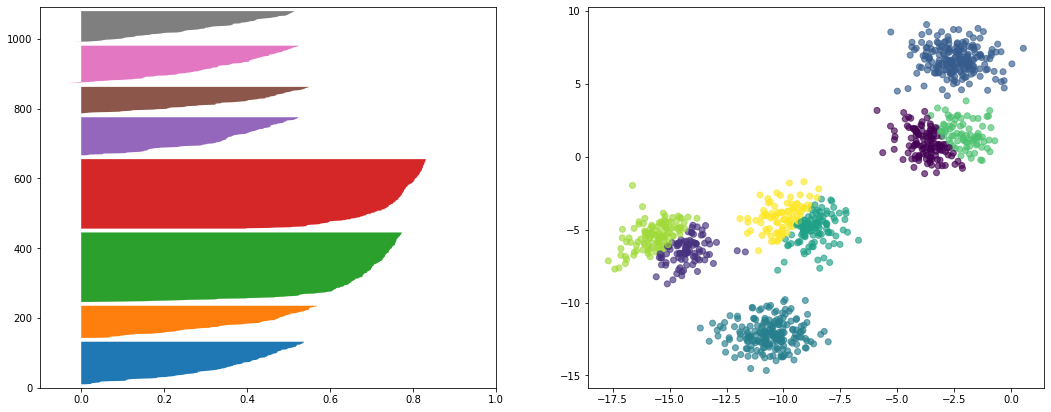

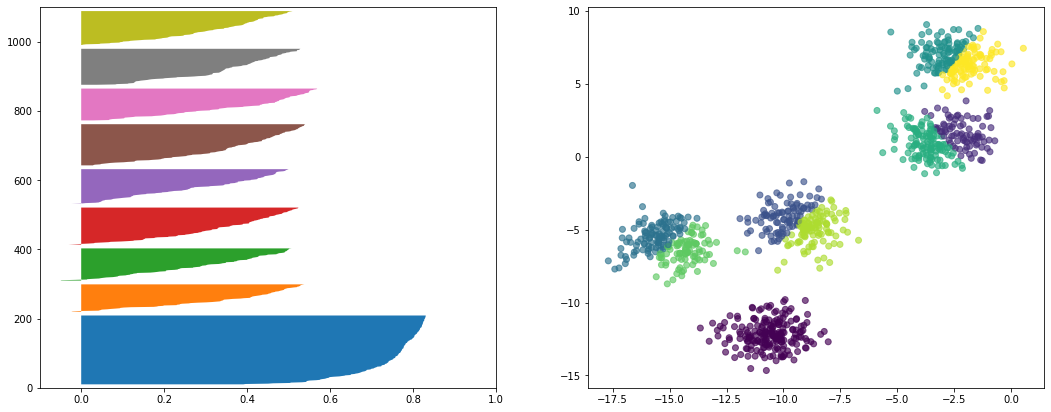

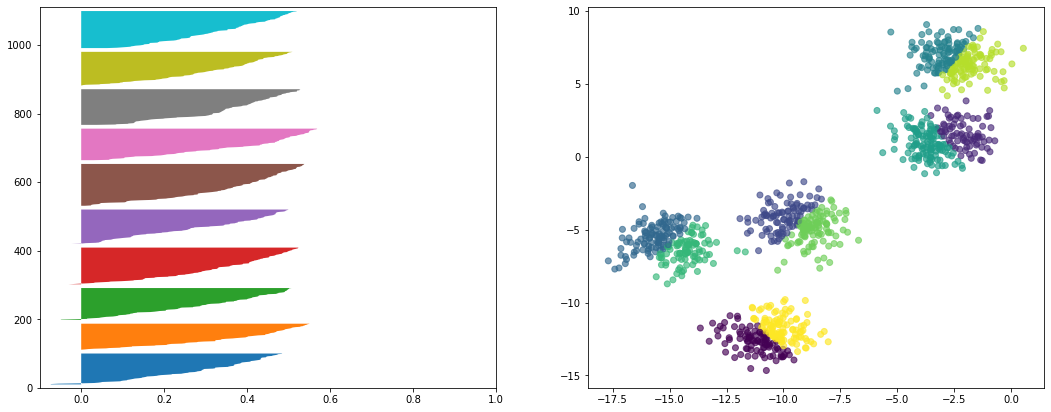

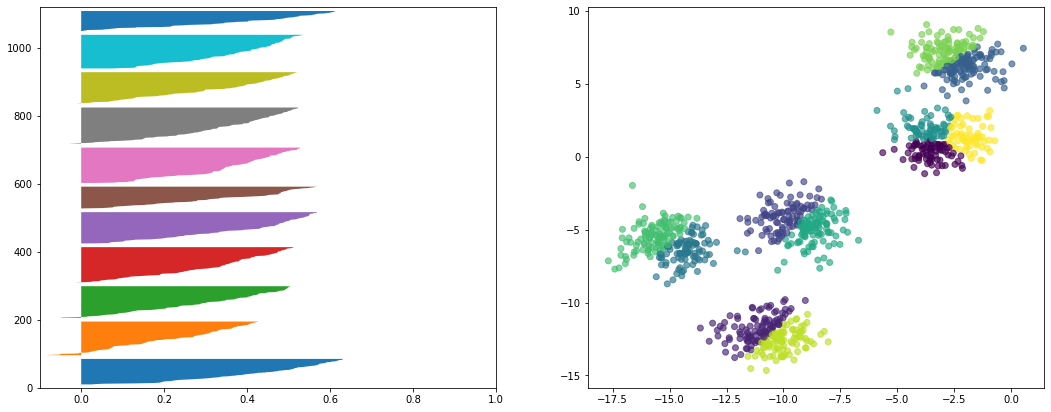

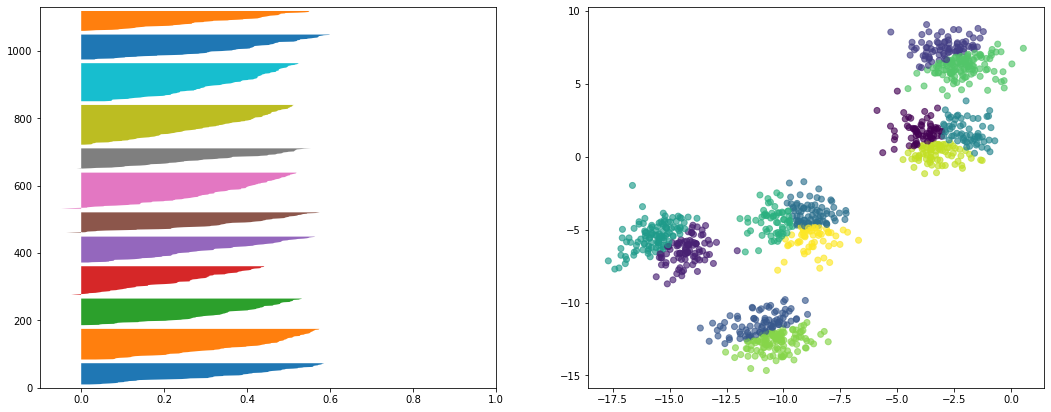

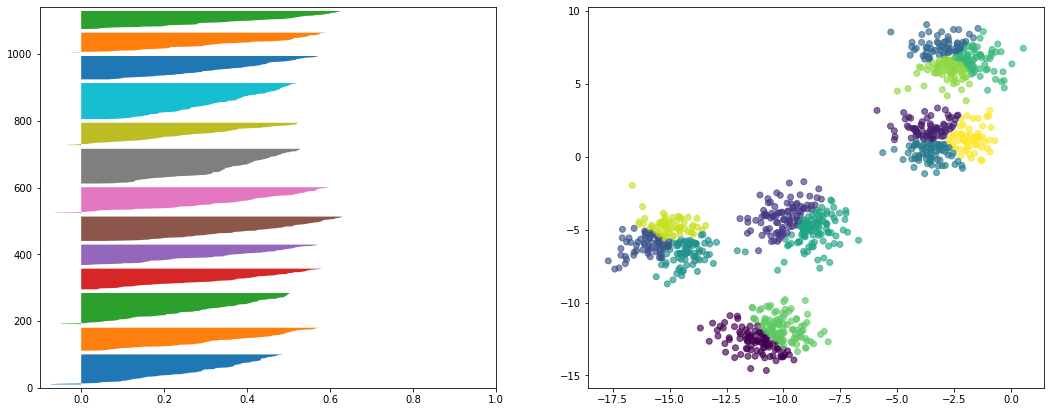

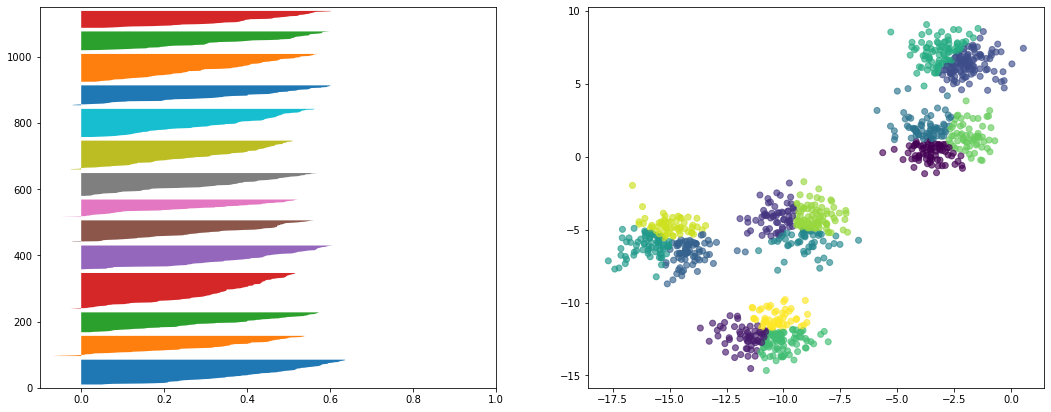

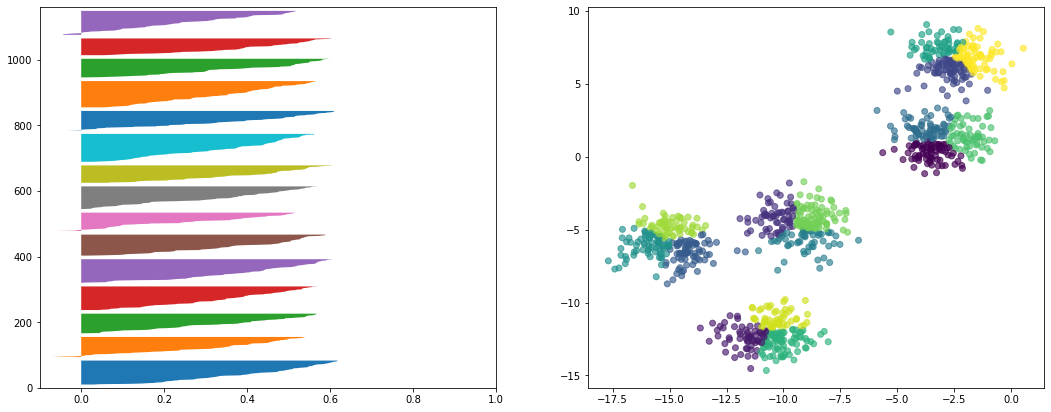

In [5]:
clusters = 15
for cluster in range(2,clusters+1):
    km = KMeans(n_clusters=cluster,random_state=1)
    y = km.fit_predict(X)

    # plt.figure(figsize=(20,15))
    # plt.scatter(X[:,0],X[:,1],alpha = 0.75,c = y)
    # plt.show()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (cluster + 1) * 10])
    score = silhouette_score(X,y)
    print('score :',score)
    
    ax2.scatter(X[:,0], X[:,1], alpha = 0.65, c = y)
    sil_sample = silhouette_samples(X,y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

In [6]:
# we can silhouette score is one of max is at cluster = 5
# and also there no negative value laying silhouette values 
# hence we select cluster = 5

# Predicting Labels

In [7]:
km1 = KMeans(n_clusters = 5)

In [8]:
Y_pred = km1.fit_predict(X)

# for Boundry

In [9]:
a = np.arange(X[:,0].min() - 2, X[:,0].max() + 2, 0.01)
b = np.arange(X[:,1].min() - 2, X[:,1].max() + 2, 0.01)
aa, bb = np.meshgrid(a, b)
aa.shape, bb.shape

((2773, 2224), (2773, 2224))

In [10]:
X_new = np.array([aa.ravel(), bb.ravel()])
X_new = X_new.T
X_new.shape

(6167152, 2)

In [11]:
Y_new = km1.predict(X_new)

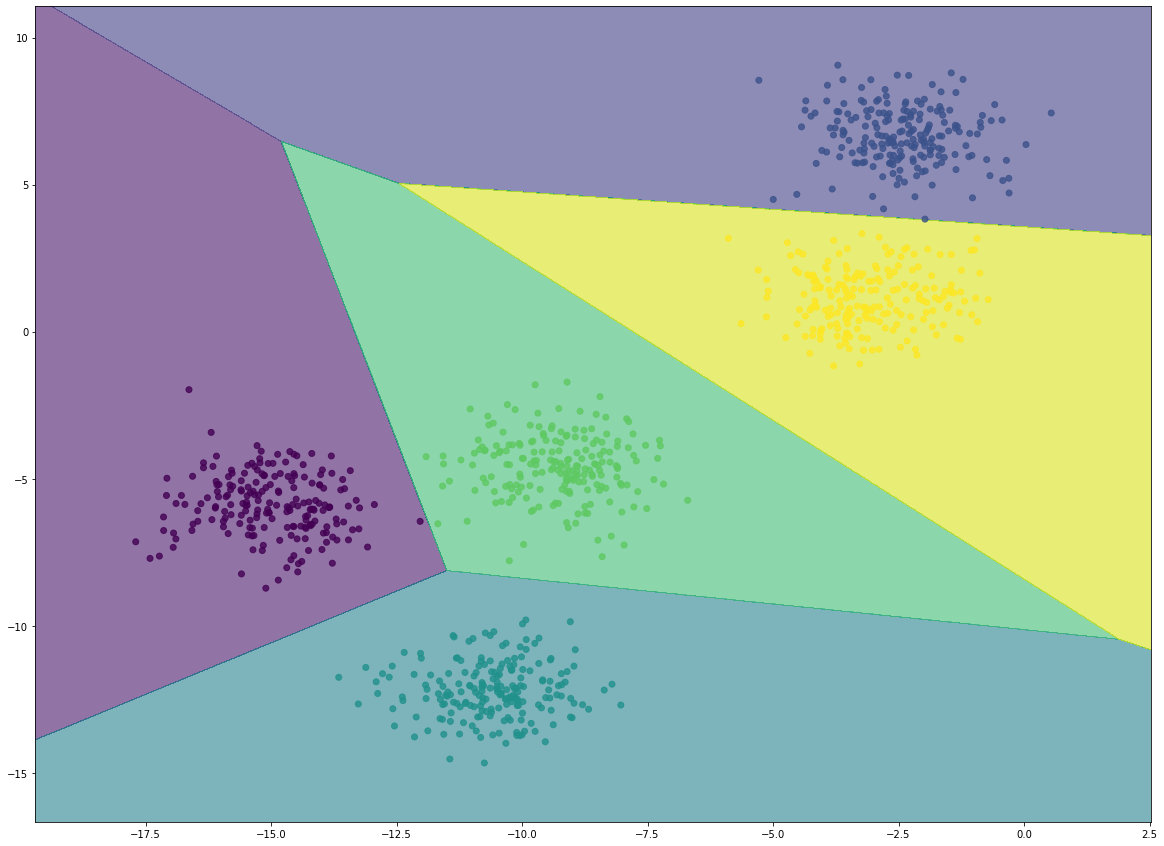

In [12]:
plt.figure(figsize = (20,15))
plt.contourf(aa, bb, Y_new.reshape(aa.shape),alpha=0.60)
plt.scatter(X[:,0], X[:,1], alpha = 0.8, c = Y_pred)

# Scrach Code

In [13]:

# class K_Means:
#     def _init_(self,k=2,max_iter=100):
#         print("constructor")
#         self.k=k
#         self.max_iter=max_iter
#     def fit(self,data):
#         self.means=[]
#         #randomly initialise the means
#         for i in range(self.k):
#             self.means.append(data[i])
#         for i in range(self.max_iter):
#             #assign the data points to the cluster that they belong to
#             #create empty clusters
#             clusters=[]
#             for j in range(self.k):
#                 clusters.append([])
#             for point in data:
#                 #find distance to all the mean values
#                 distances=[((point_m)**2).sum() for m in self.means]
#                 #find the min distance
#                 minDistance=min(distance)
#                 #find the mean for which we got the minimum distance
#                 l=distance.index(minDistance)
#                 #add this point to cluster l
#                 clusters[l].append(point)
#             #calculate the new mean values
#             change=False
#             for j in range(self.k):
#                 new_mean=np.average(cluster[j],axis=0)
#                 if not np.array_equal(self.means[j]):
#                     change=True
#                 self.means[j]=new_mean
#             if not change:
#                 break
#     def predict(self,test_data):
#         predictions=[]
#         for point in test_data:
#             #find distance to all mean values
#             distances=[((point-m)**2).sum() for m in self.means]
#             #find the min distance
#             minDistance=min(distances)
#             #find the mean for which we got the minimum distance
#             l=distances.index(minDistance)
#             #add this point to cluster l
#             predictions.append(l)
#         return predictions